In [1]:
import numpy as np
import torch
from torch import autocast
from slugify import slugify
from time import time

from diffusers import StableDiffusionInpaintPipeline
from diffusion_utils import stable_diffusion_preprocess_image

In [2]:
device     = 'cuda'
model_path = 'models/stable-diffusion-v1.4'

#scheduler = DDIMScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear", clip_sample=False, set_alpha_to_one=False)
model = StableDiffusionInpaintPipeline.from_pretrained(
    model_path,
    #scheduler=scheduler,
    revision='fp16',
    torch_dtype=torch.float16,
).to(device)

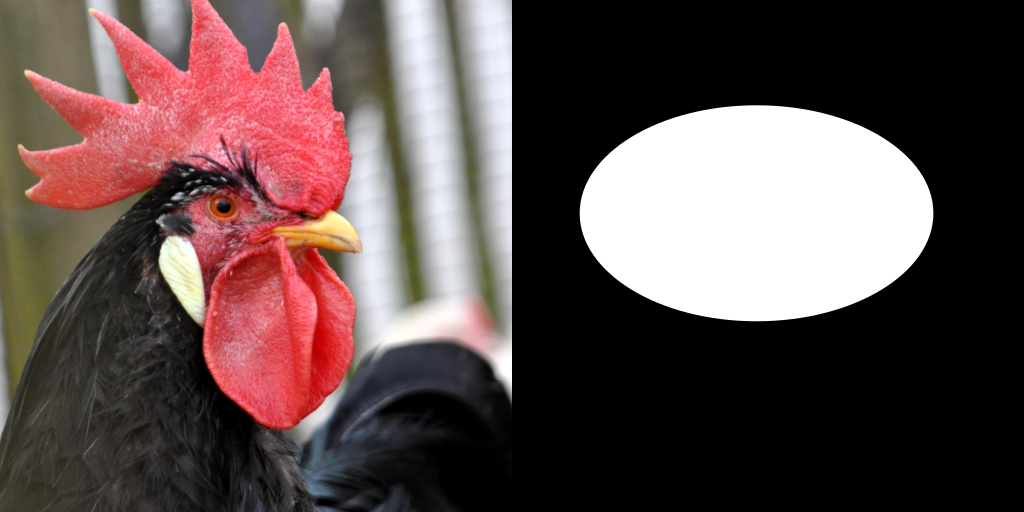

In [3]:
# load image
image, mask, side_by_side = stable_diffusion_preprocess_image(
    'inpainting_example_image.png',
    mask_path='inpainting_example_mask.png',
    width=512,
    height=512
)

side_by_side

In [4]:
generator = torch.Generator(device=device).manual_seed(42)

0it [00:00, ?it/s]

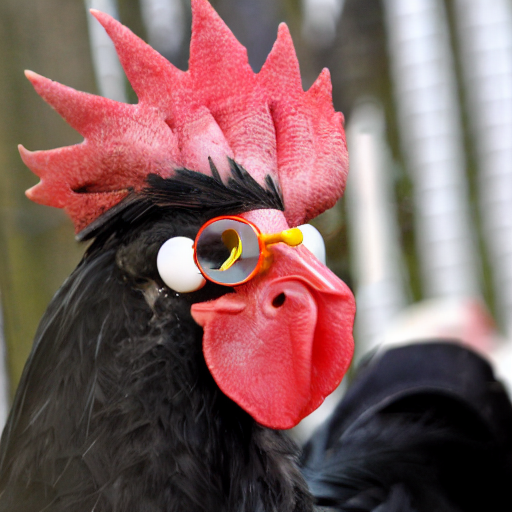

0it [00:00, ?it/s]

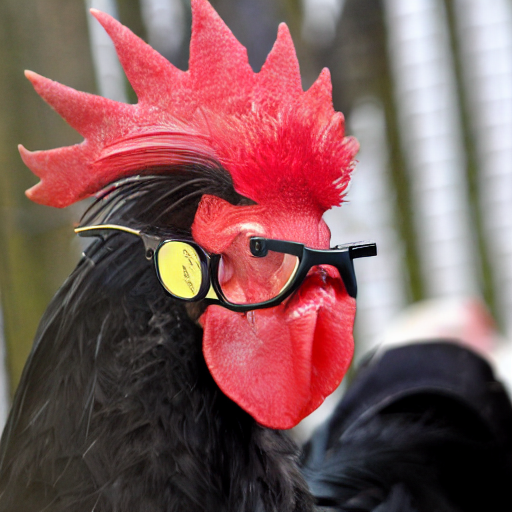

0it [00:00, ?it/s]

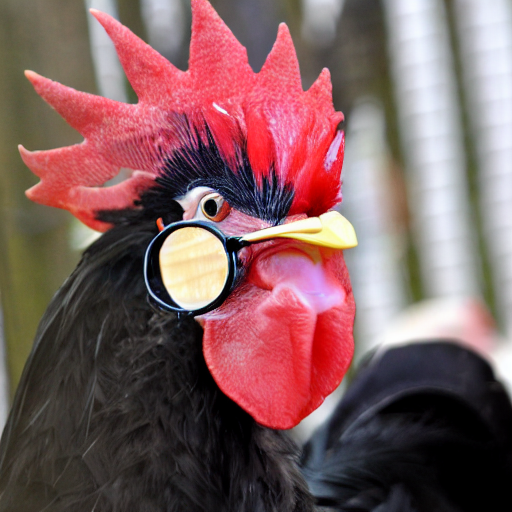

In [5]:
prompt = 'eyeglasses on a rooster beak, a rooster wearing eyeglasses, eyeglasses on beak, looking right'
repetitions = 3

with autocast('cuda'):
    for r in range(repetitions):
        out_image = model(
            prompt = prompt,
            init_image = image,
            mask_image = mask,
            num_inference_steps = 50,
            strength = 0.7, # 0 = no noise, 1 = max noise
            guidance_scale = 8,# how much to rely on the textual prompt
            generator = generator,
        )
        out_image = out_image['sample'][0]
        out_image.show()
        out_image.save(f'images/{time()}_{slugify(prompt[:100])}.png')